# Data Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

df = pd.read_csv(r"C:\Users\utkub\OneDrive\Masaüstü\Code\TelecomChurn\telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [2]:
# reformat column names
df.columns = [col.lower().replace(' ', "_") for col in df.columns]

In [3]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


| Acronyms   | Descriptions                                                     |
|------------|------------------------------------------------------------------|
| MOBILE_NUMBER | Customer phone number                                        |
| CIRCLE_ID    | Telecom circle area to which the customer belongs to         |
| LOC          | Local calls - within same telecom circle                     |
| STD          | STD calls - outside the calling circle                       |
| IC           | Incoming calls                                               |
| OG           | Outgoing calls                                               |
| T2T          | Operator T to T, i.e. within same operator (mobile to mobile) |
| T2M          | Operator T to other operator mobile                          |
| T2O          | Operator T to other operator fixed line                      |
| T2F          | Operator T to fixed lines of T                                |
| T2C          | Operator T to it’s own call center                            |
| ARPU         | Average revenue per user                                     |
| MOU          | Minutes of usage - voice calls                                |
| AON          | Age on network - number of days the customer is using the operator T network |
| ONNET        | All kind of calls within the same operator network           |
| OFFNET       | All kind of calls outside the operator T network              |
| ROAM         | Indicates that customer is in roaming zone during the call   |
| SPL          | Special calls                                                 |
| ISD          | ISD calls                                                     |
| RECH         | Recharge                                                      |
| NUM          | Number                                                        |
| AMT          | Amount in local currency                                      |
| MAX          | Maximum                                                       |
| DATA         | Mobile internet                                               |
| 3G           | 3G network                                                    |
| AV           | Average                                                       |
| VOL          | Mobile internet usage volume (in MB)                          |
| 2G           | 2G network                                                    |
| PCK          | Prepaid service schemes called - PACKS                        |
| NIGHT        | Scheme to use during specific night hours only                |
| MONTHLY      | Service schemes with validity equivalent to a month           |
| SACHET       | Service schemes with validity smaller than a month            |
| *.6          | KPI for the month of June                                     |
| *.7          | KPI for the month of July                                     |
| *.8          | KPI for the month of August                                   |
| *.9          | KPI for the month of September                                |
| FB_USER      | Service scheme to avail services of Facebook and similar social networking sites |
| VBC          | Volume based cost - when no specific scheme is not purchased and paid as per usage |

# Handling Missing Values

In [6]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts != 0]
columns_with_nulls


loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_7      601
last_date_of_month_8     1100
                        ...  
night_pck_user_9        74077
fb_user_6               74846
fb_user_7               74428
fb_user_8               73660
fb_user_9               74077
Length: 166, dtype: int64

In [7]:
null_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
null_percentage

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

In [8]:
# Drop columns with more than 30% null values
threshold = 30
columns_to_drop = null_percentage[null_percentage > threshold].index
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(99999, 186)

In [9]:
# Drop date columns
columns_to_drop = [col for col in df.columns if 'date' in col]
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(99999, 178)

In [10]:
# Dropping columns that have only one value (where std == 0)
df_std = df.std()
columns_to_drop = df_std[df_std == 0].index
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(99999, 166)

In [11]:
# Dropping rows that have more than %50 missing values
total_columns = len(df.columns)
max_missing_values = total_columns // 2
missing_val_per_row = df.isnull().sum(axis=1)
rows_to_drop = missing_val_per_row[missing_val_per_row > max_missing_values].index
df.drop(index=rows_to_drop, inplace=True)
df.shape

(98981, 166)

In [12]:
# filling missing values with mean
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

df.shape

(98981, 166)

#  Picking valuable customers

In [13]:
# RECH is the recharege and we will use this to define customer value
rech_columns = df.filter(regex='rech', axis=1).columns
rech_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9'],
      dtype='object')

In [14]:
# Creating average recharge amount and recharge number columns
amt_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9'].copy()
num_cols = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9']

df['avg_rech_amt'] = df[amt_cols].mean(axis=1)
df['avg_rech_num'] = df[num_cols].mean(axis=1)

In [15]:
threshold = df['avg_rech_amt'].quantile(0.8)
threshold
# Dataframe of valueable customers
df_val_cus = df[df['avg_rech_amt'] > threshold]
df_val_cus.shape

(19789, 168)

# Picking churn

In [16]:
df_val_cus['churn'] = np.where((df_val_cus['total_og_mou_9'] == 0) & (df_val_cus['vol_2g_mb_9'] == 0) & (df_val_cus['vol_3g_mb_9'] == 0), 1, 0)
# number of churners out of 20k, churn percentage
df_val_cus['churn'].sum(), round(100*(df_val_cus['churn'].mean()),2)

(785, 3.97)

In [17]:
# Removing columns associated with churn 
col_9 = [col for col in df_val_cus.columns.to_list() if '_9' in col]
col_sep = [col for col in df_val_cus.columns.to_list() if 'sep' in col]
df_val_cus = df_val_cus.drop(col_9, axis=1)
df_val_cus = df_val_cus.drop(col_sep, axis=1)
df_val_cus.shape

(19789, 128)

# Outliers


In [18]:

df_val_cus['churn'] = df_val_cus['churn'].astype('object')
df_val_cus['mobile_number'] = df_val_cus['mobile_number'].astype('object')
numeric_cols = df_val_cus.select_dtypes(exclude=['object']).columns

for col in numeric_cols:
    q1 = df_val_cus[col].quantile(0.1)
    q3 = df_val_cus[col].quantile(0.9)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_filtered = df_val_cus.loc[(df_val_cus[col] > lower_bound) & (df_val_cus[col] < upper_bound)]


df_filtered['churn'] = df_filtered['churn'].astype('int64')
df_filtered['mobile_number'] = df_filtered['mobile_number'].astype('int64')
df_filtered.shape


(19654, 128)

# New features

In [19]:
# Arpu growth rate column
df_filtered["arpu_growth_6_8"] = ((df_filtered["arpu_8"] - df_filtered["arpu_6"]) / df_filtered["arpu_6"]).fillna(0)
# Adjustment
df_filtered["arpu_growth_6_8"] = df_filtered["arpu_growth_6_8"].replace([float('inf'), float('-inf')], 0)

# Recharge rate change column
df_filtered["recharge_frequency_change_6_8"] = ((df_filtered["total_rech_num_8"] - df_filtered["total_rech_num_6"]) / df_filtered["total_rech_num_6"]).fillna(0)
# Adjustment
df_filtered["recharge_frequency_change_6_8"] = df_filtered["recharge_frequency_change_6_8"].replace([float('inf'), float('-inf')], 0)



# Data usage growth column
df_filtered["data_usage_growth_3g_6_to_8"] = ((df_filtered["vol_3g_mb_8"] - df_filtered["vol_3g_mb_6"]) / df_filtered["vol_3g_mb_6"]).fillna(0)
# Adjustment
df_filtered["data_usage_growth_3g_6_to_8"] = df_filtered["data_usage_growth_3g_6_to_8"].replace([float('inf'), float('-inf')], 0)

# Total mou (incoming + outgoing) per month
months = ['6', '7', '8']
for month in months:
    df_filtered[f"total_mou_{month}"] = df_filtered[f"total_og_mou_{month}"] + df_filtered[f"total_ic_mou_{month}"]


In [20]:
# Recharge rate change
df_filtered["diff_rech_num"] = df_filtered["avg_rech_num"] - df_filtered["total_rech_num_6"]

# Recharge rate change identifier
df_filtered["diff_rech_num_decreased"] = ((df_filtered["avg_rech_num"] - df_filtered["total_rech_num_6"]) < 0).astype('int64')

# Recharge amount change
df_filtered["diff_rech_amt"] = df_filtered["avg_rech_amt"] - df_filtered["total_rech_amt_6"]

# Recharge amount change identifier
df_filtered["diff_rech_amt_decreased"] = ((df_filtered["avg_rech_amt"] - df_filtered["total_rech_amt_6"]) < 0).astype('int64')

In [21]:
# VBC avg
df_filtered["avg_vbc"] = (df_filtered["jul_vbc_3g"] + df_filtered["aug_vbc_3g"])/2
# VBC change
df_filtered["vbc_diff"] = df_filtered["avg_vbc"] - df_filtered["jun_vbc_3g"]

In [22]:
# Average mou Jun July
df_filtered["avg_mou_6_7"] = (df_filtered["total_mou_6"] + df_filtered["total_mou_7"]) / 2

# Average mou July Aug
df_filtered["avg_mou_7_8"] = (df_filtered["total_mou_7"] + df_filtered["total_mou_8"]) / 2

# Mou change
df_filtered["diff_mou"] = df_filtered["avg_mou_7_8"] - df_filtered["avg_mou_6_7"]

# Mou decrease identifier
df_filtered["avg_mou_decreased"] = ((df_filtered["avg_mou_6_7"] > df_filtered["avg_mou_7_8"])).astype(int)

In [23]:

# STD change in mou
df_filtered["mou_consistency"] = df_filtered[["total_mou_6", "total_mou_7", "total_mou_8"]].std(axis=1)

# 
# all artificial columns
df_filtered.iloc[:5, -20:]


,avg_rech_amt,avg_rech_num,churn,arpu_growth_6_8,recharge_frequency_change_6_8,data_usage_growth_3g_6_to_8,total_mou_6,total_mou_7,total_mou_8,diff_rech_num,diff_rech_num_decreased,diff_rech_amt,diff_rech_amt_decreased,avg_vbc,vbc_diff,avg_mou_6_7,avg_mou_7_8,diff_mou,avg_mou_decreased,mou_consistency
7,1502.00,5.00,1,1.966273,0.400000,0.000000,1113.99,1167.28,778.90,0.00,0,-78.00,1,38.560,19.820,1140.635,973.090,-167.545,1,210.540636
15,484.50,8.25,0,18.053000,10.000000,0.000000,0.00,1191.12,1381.94,7.25,0,484.50,0,0.000,0.000,595.560,1286.530,690.970,0,748.881087
21,669.50,23.00,0,0.239686,0.227273,0.000000,1067.43,1160.68,1329.58,1.00,0,69.50,0,0.000,0.000,1114.055,1245.130,131.075,0,132.881774
33,1331.50,7.00,0,-0.581145,-0.857143,1.194082,7.89,7.19,42.35,0.00,0,273.50,0,1532.465,-182.205,7.540,24.770,17.230,0,20.100610
38,489.75,17.50,0,0.082206,-0.777778,0.000000,408.65,738.48,813.83,-9.50,1,69.75,0,0.000,0.000,573.565,776.155,202.590,0,215.497983


# EDA

In [24]:
data = df_filtered

data_churn = data[data['churn'] == 1]
data_non_churn = data[data['churn'] == 0]

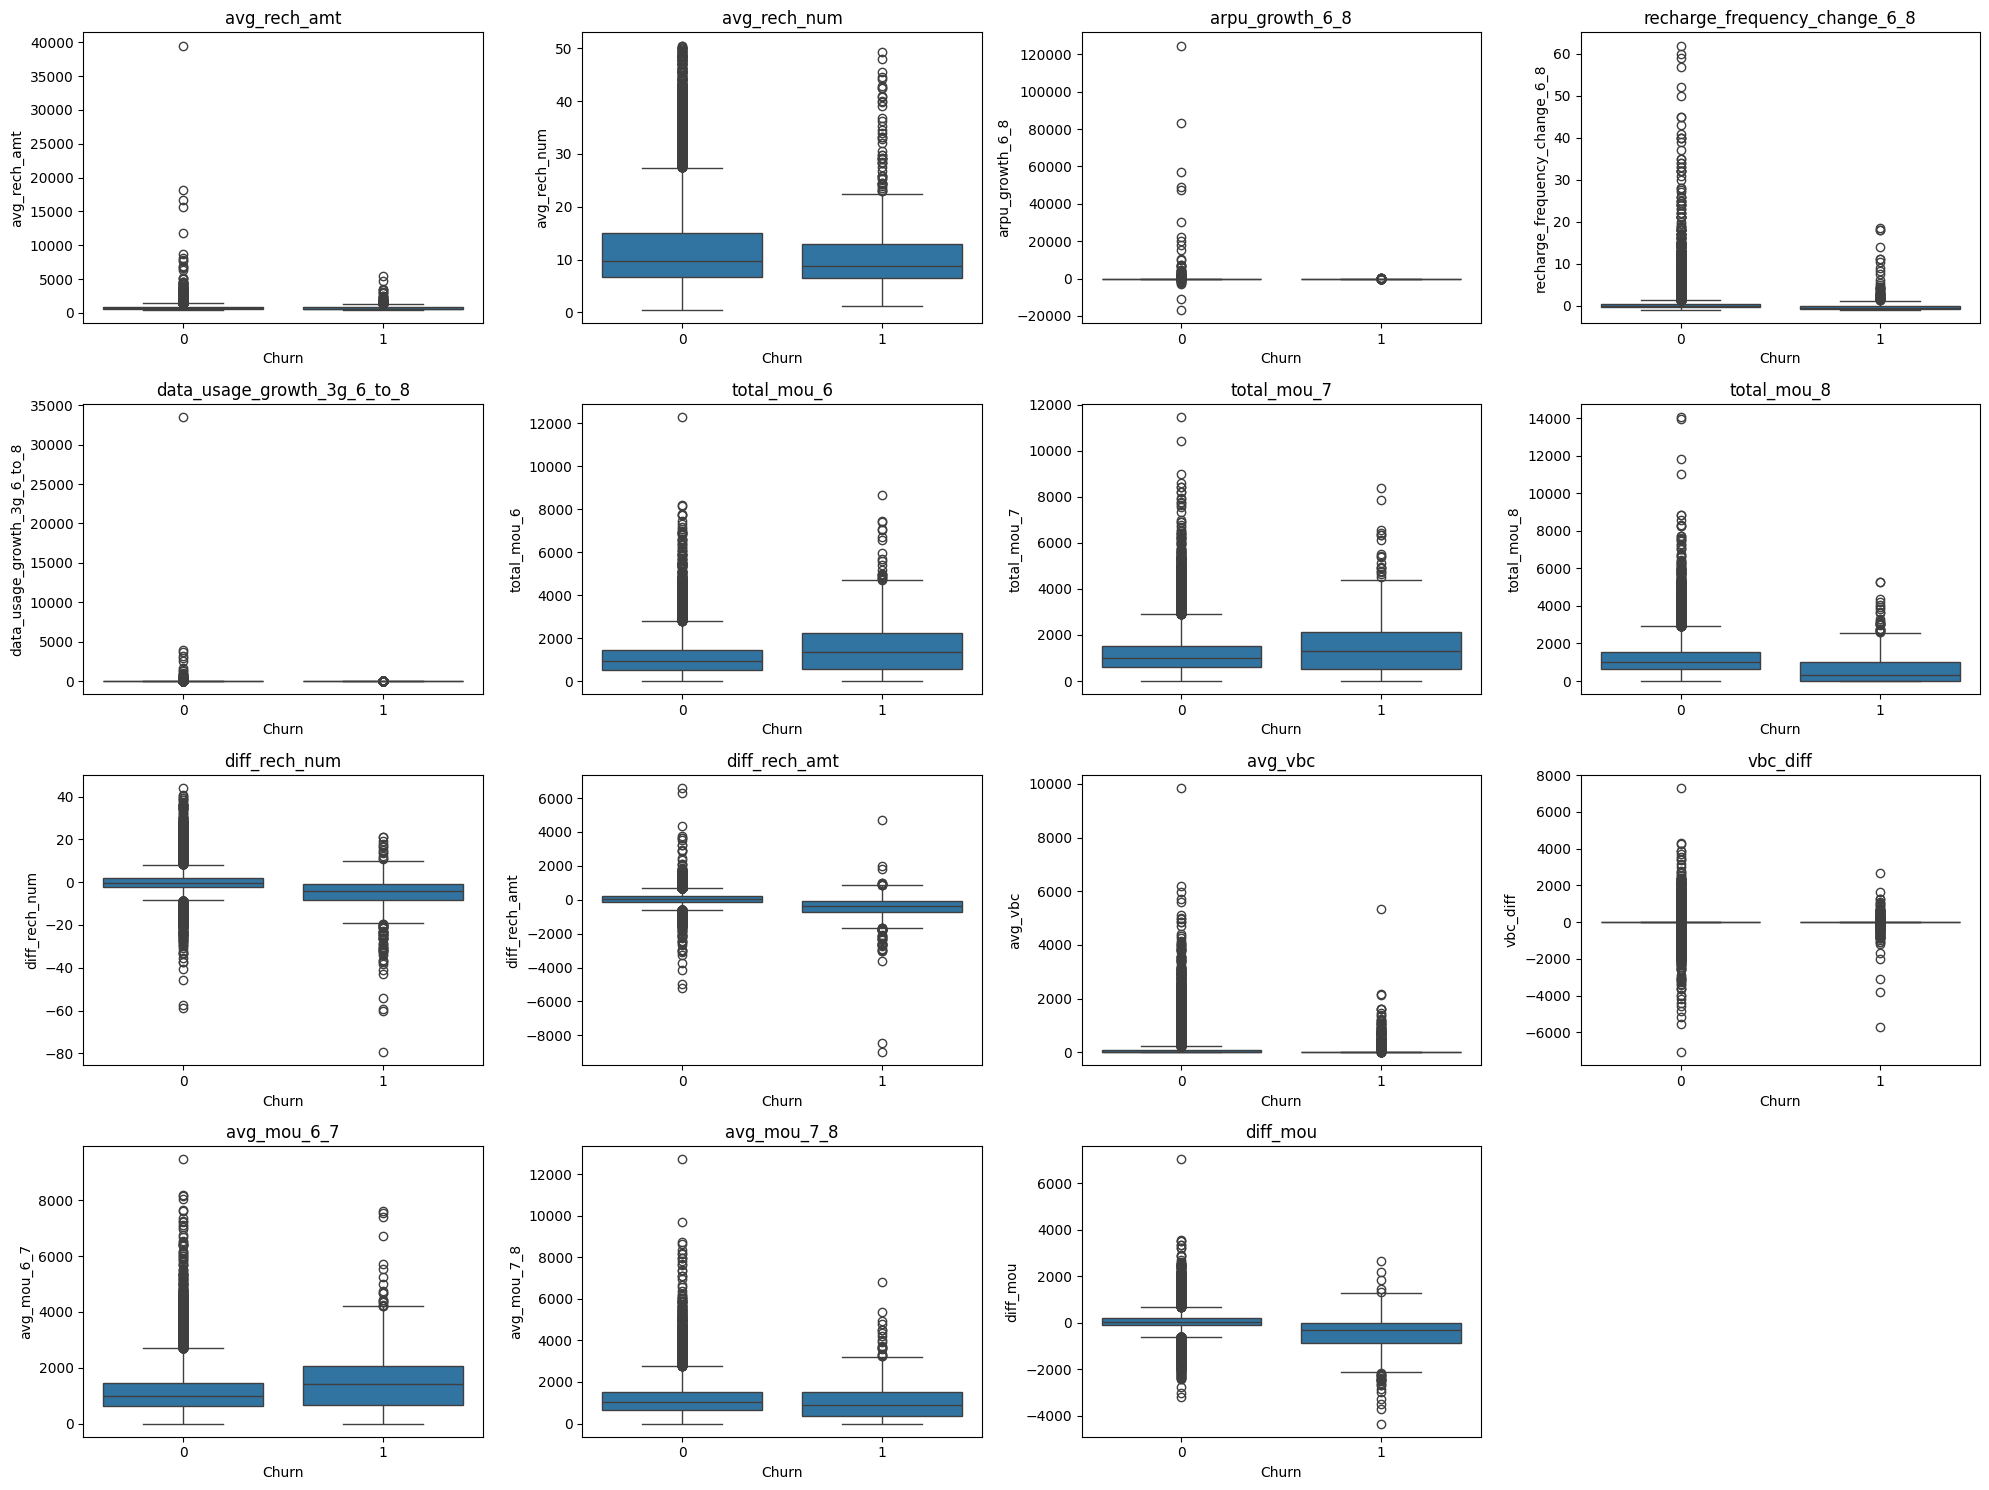

In [25]:
# Visualization of the relationship of new columns with churn
columns_to_compare = ['avg_rech_amt', 'avg_rech_num', 'arpu_growth_6_8', 'recharge_frequency_change_6_8', 'data_usage_growth_3g_6_to_8', 'total_mou_6', 'total_mou_7', 'total_mou_8', 'diff_rech_num', 'diff_rech_amt', 'avg_vbc', 'vbc_diff', 'avg_mou_6_7', 'avg_mou_7_8', 'diff_mou', 'mou_consistency']

# Plotting box plots for each column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_compare[:15], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='churn', y=column, data=data)
    plt.title(column)
    plt.xlabel('Churn')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


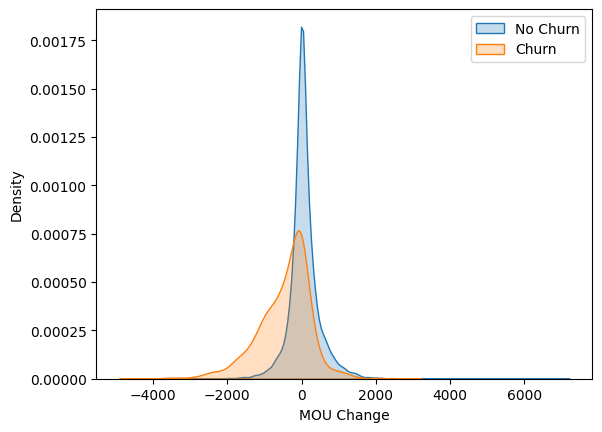

In [26]:
sns.kdeplot(data=data[data['churn'] == False]['diff_mou'], label='No Churn', color='#1f77b4', fill=True)
sns.kdeplot(data=data[data['churn'] == True]['diff_mou'], label='Churn', color='#ff7f0e', fill=True)


plt.xlabel('MOU Change')
plt.ylabel('Density')
plt.legend()
plt.show()

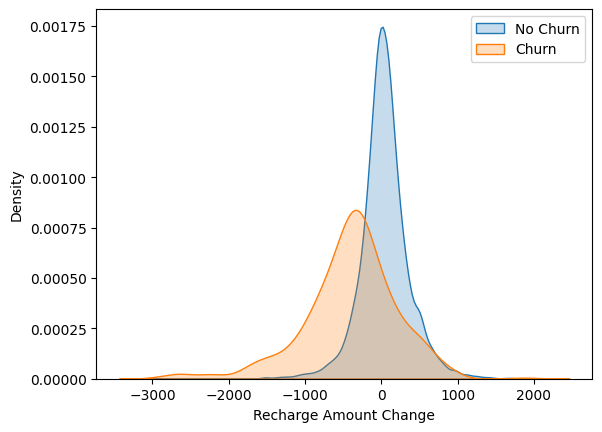

In [27]:
filtered_data = data[(data['diff_rech_amt'] < 2000) & (data['diff_rech_amt'] > -3000)]

sns.kdeplot(data=filtered_data[filtered_data['churn'] == False]['diff_rech_amt'], label='No Churn', color='#1f77b4', fill=True)
sns.kdeplot(data=filtered_data[filtered_data['churn'] == True]['diff_rech_amt'], label='Churn', color='#ff7f0e', fill=True)


plt.xlabel('Recharge Amount Change')
plt.ylabel('Density')
plt.legend()
plt.show()

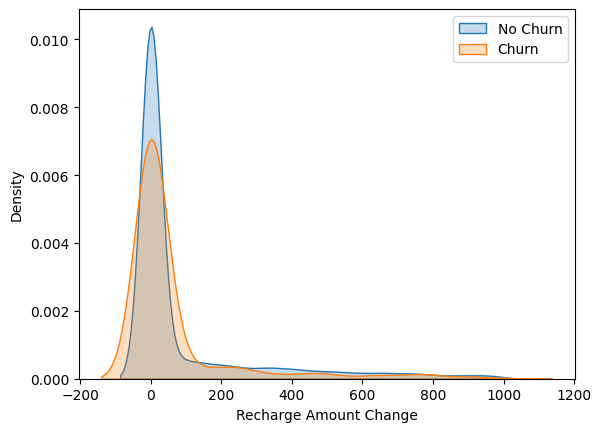

In [28]:
filtered_data = data[(data['avg_vbc'] < 1000)]


sns.kdeplot(data=filtered_data[filtered_data['churn'] == False]['avg_vbc'], label='No Churn', color='#1f77b4', fill=True)
sns.kdeplot(data=filtered_data[filtered_data['churn'] == True]['avg_vbc'], label='Churn', color='#ff7f0e', fill=True)


plt.xlabel('Recharge Amount Change')
plt.ylabel('Density')
plt.legend()
plt.show()

## Bivariate Analysis

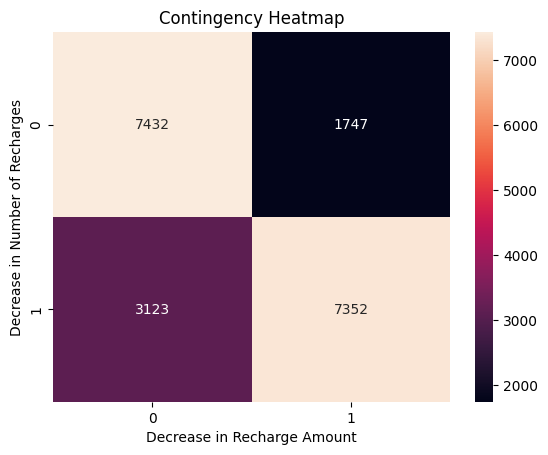

In [29]:
contingency_table = pd.crosstab(data['diff_rech_num_decreased'], data['diff_rech_amt_decreased'])

sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Contingency Heatmap')
plt.xlabel('Decrease in Recharge Amount')
plt.ylabel('Decrease in Number of Recharges')
plt.show()



In [30]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
contingency_table, chi2, p, dof, expected

(diff_rech_amt_decreased     0     1
 diff_rech_num_decreased            
 0                        7432  1747
 1                        3123  7352,
 5146.678141170938,
 0.0,
 1,
 array([[4929.49755775, 4249.50244225],
        [5625.50244225, 4849.49755775]]))

# Data Separation

In [31]:
X = data.drop(['mobile_number', 'churn'], axis=1)
y = data['churn'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prevent Imbalanced Data

In [32]:
# Applied SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

